In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carichiamo il file Excel per vedere il contenuto
file_path = '/Users/cami/Documents/GitHub/pyesm_thesis/tesi_camilla/casi_MarioU/Res_dataframes.xlsx'
excel_data = pd.ExcelFile(file_path)

df = pd.read_excel(excel_data, sheet_name='Sheet1')

df_clean = df.copy()
df_clean = df_clean.drop([0, 1])     # Rimuoviamo la riga delle città e degli utenti
df_clean.set_index('house', inplace=True)

In [4]:
# Selezioniamo solo i dati per EE e NG
data_electricity = df_clean.loc['Q_EE']
data_gas = df_clean.loc['Q_NG']

# Rinominiamo le colonne per chiarezza
data_electricity.columns = ['Electricity']
data_gas.columns = ['Gas']

# Creiamo un DataFrame congiunto per il grafico
data_combined = pd.concat([data_electricity, data_gas], axis=1)
data_combined.reset_index(inplace=True)
data_combined.columns = ['User', 'Electricity', 'Gas']

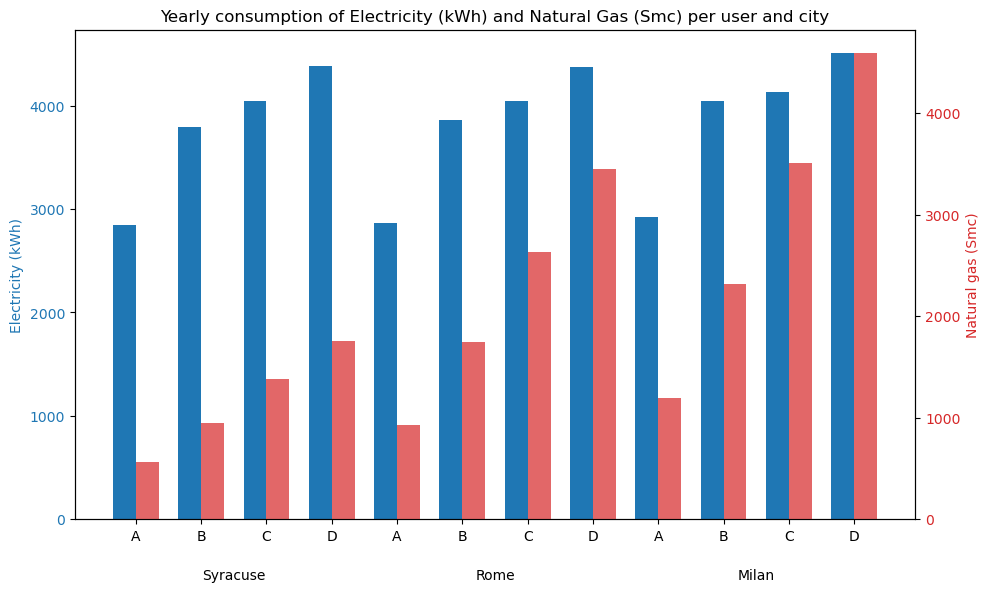

In [5]:
names=[]
for s in range(3):
    for i in ['A', 'B', 'C', 'D']:
        names.append(i)
data_combined['User'] = names
# Definiamo la posizione delle barre
x = np.arange(len(data_combined['User']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico per l'elettricità (asse sinistro)
rects1 = ax1.bar(x - width/2, data_combined['Electricity'], width, label='Electricity', color='#1f77b4')
ax1.set_ylabel('Electricity (kWh)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Asse destro per il gas
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, data_combined['Gas'], width, label='Gas', color='#d62728', alpha=0.7)
ax2.set_ylabel('Natural gas (Smc)', color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(data_combined['User'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.1, city, ha='center', va='top', transform=ax1.get_xaxis_transform())


# Titolo e layout
plt.title('Yearly consumption of Electricity (kWh) and Natural Gas (Smc) per user and city')
fig.tight_layout()

# Mostriamo il grafico
plt.show()


In [6]:
# Selezioniamo solo i dati per opex e capex
opex = df_clean.loc['opex']
capex = df_clean.loc['capex']

# Rinominiamo le colonne per chiarezza
opex.columns = ['opex']
capex.columns = ['capex']

# Creiamo un DataFrame congiunto per il grafico
data_combined = pd.concat([opex, capex], axis=1)
data_combined.reset_index(inplace=True)
data_combined.columns = ['User', 'Opex', 'Capex']

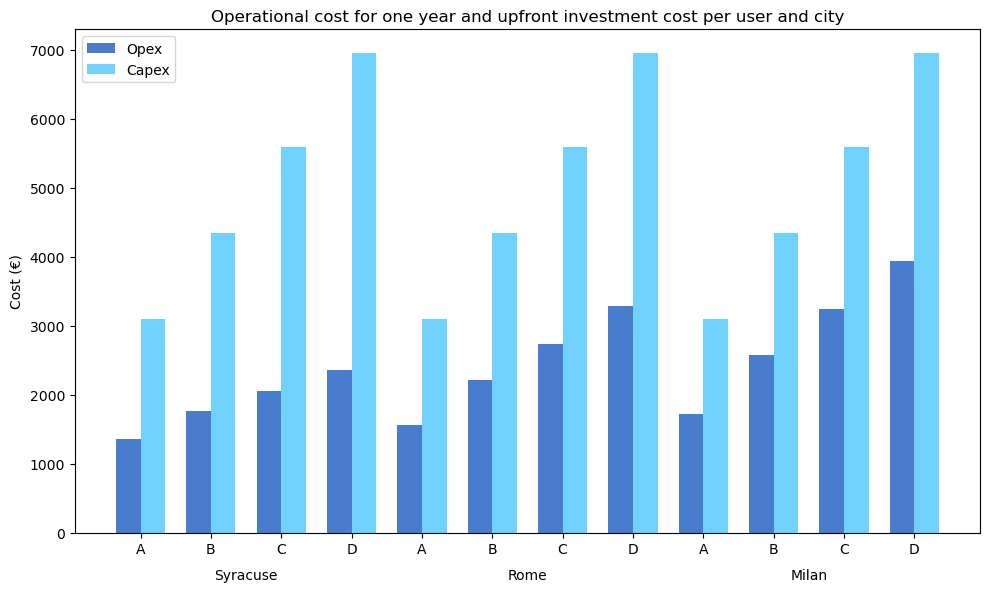

In [7]:
names=[]
for s in range(3):
    for i in ['A', 'B', 'C', 'D']:
        names.append(i)
data_combined['User'] = names

# Definiamo la posizione delle barre
x = np.arange(len(data_combined['User']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre per opex e capex
rects1 = ax.bar(x - width/2, data_combined['Opex'], width, label='Opex', color='#4A7CCD')
rects2 = ax.bar(x + width/2, data_combined['Capex'], width, label='Capex', color='#70D2FB')

# Aggiungiamo le etichette degli utenti e l'asse y in €
ax.set_ylabel('Cost (€)')
ax.set_xticks(x)
ax.set_xticklabels(data_combined['User'])


# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())

ax.legend()
# Titolo e layout
plt.title('Operational cost for one year and upfront investment cost per user and city')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

In [8]:
# Define the parameters
short_city=['Si','Ro','Mi']
long_city=['Siracusa','Roma','Milano']
df_graph=pd.DataFrame(columns=['users','YEE','AC','Boiler','Cooking'])
df_CO2_act=pd.DataFrame(columns=['users','EE','gas'])
for c in range(3):
    city=short_city[c]
    city_extended=long_city[c]
    csv_folder=f'{city_extended}/Results/Base_Results_csv'
    cost_op_tot_all = pd.read_csv(f'{csv_folder}/cost_op_tot.csv',usecols=lambda column: column != 'id')
    active_techs_all = pd.read_csv(f'{csv_folder}/active_techs.csv',usecols=lambda column: column != 'id')
    cap_tot_all = pd.read_csv(f'{csv_folder}/cap_tot.csv',usecols=lambda column: column != 'id')
    new_units_all = pd.read_csv(f'{csv_folder}/new_units.csv',usecols=lambda column: column != 'id')
    cap_new_all = pd.read_csv(f'{csv_folder}/cap_new.csv',usecols=lambda column: column != 'id')
    CO2_tot_all = pd.read_csv(f'{csv_folder}/CO2_tot.csv',usecols=lambda column: column != 'id')
    CO2_act_all = pd.read_csv(f'{csv_folder}/CO2_act.csv',usecols=lambda column: column != 'id')
    insulation_all = pd.read_csv(f'{csv_folder}/insulation.csv',usecols=lambda column: column != 'id')
    X_all = pd.read_csv(f'{csv_folder}/X.csv',usecols=lambda column: column != 'id')
    Xt_all = pd.read_csv(f'{csv_folder}/X_t.csv',usecols=lambda column: column != 'id')
    Q_all = pd.read_csv(f'{csv_folder}/Q.csv',usecols=lambda column: column != 'id')
    SOC_all = pd.read_csv(f'{csv_folder}/SOC.csv',usecols=lambda column: column != 'id')
    # Importing exogenous data from data_input excel
    excel_file = f'{city_extended}/input_data/input_data_base.xlsx'
    Y_all = pd.read_excel(excel_file, sheet_name='Y',usecols=lambda column: column != 'id')
    cost_cap = pd.read_excel(excel_file, sheet_name='cost_cap',usecols=lambda column: column != 'id')
    cost_period = pd.read_excel(excel_file, sheet_name='cost_period',usecols=lambda column: column != 'id')
    cost_inv_all = pd.read_excel(excel_file, sheet_name='cost_inv',usecols=lambda column: column != 'id')
    disc_frac_pd = pd.read_excel(excel_file, sheet_name='disc_frac',usecols=lambda column: column != 'id')
    disc_frac=disc_frac_pd.at[0,'values']
    TI_cost_all = pd.read_excel(excel_file, sheet_name='TI_cost',usecols=lambda column: column != 'id')
    DPT = pd.read_excel(excel_file, sheet_name='days_per_type',usecols=lambda column: column != 'id')
    u=pd.read_excel(excel_file, sheet_name='u',usecols=lambda column: column != 'id')

    for user in ['A','B','C','D']:
        scenario=f'{city_extended} {user}'
        user_name=f'User{user}'
        #Selecting for specific user (letter)
        cost_op_tot=cost_op_tot_all.loc[cost_op_tot_all['s_names'] == f'User{user}']
        active_techs=active_techs_all.loc[active_techs_all['s_names'] == f'User{user}']
        cap_tot=cap_tot_all.loc[cap_tot_all['s_names'] == f'User{user}']
        new_units=new_units_all.loc[new_units_all['s_names'] == f'User{user}']
        cap_new=cap_new_all.loc[cap_new_all['s_names'] == f'User{user}']
        CO2_tot=CO2_tot_all.loc[CO2_tot_all['s_names'] == f'User{user}']
        CO2_act=CO2_act_all.loc[CO2_act_all['s_names'] == f'User{user}']
        insulation=insulation_all.loc[insulation_all['s_names'] == f'User{user}']
        X=X_all.loc[X_all['s_names'] == f'User{user}']
        Xt=Xt_all.loc[Xt_all['s_names'] == f'User{user}']
        Q=Q_all.loc[Q_all['s_names'] == f'User{user}']
        SOC=SOC_all.loc[SOC_all['s_names'] == f'User{user}']
        Y=Y_all.loc[Y_all['s_names'] == f'User{user}']
        cost_inv=cost_inv_all.loc[cost_inv_all['s_names'] == f'User{user}']
        TI_cost=TI_cost_all.loc[TI_cost_all['s_names'] == f'User{user}']

        for df in [cost_op_tot, active_techs, cap_tot, new_units, cap_new, CO2_tot, CO2_act, insulation, X, Xt, Q, SOC, Y, cost_inv, TI_cost]:
            df.reset_index(drop=True, inplace=True)

        #Definitions for time
        seasons = ['wi', 'mc', 'mw', 'su']
        season_names = {'wi': 'Winter', 'mc': 'Mid-cold', 'mw': 'Mid-warm', 'su': 'Summer'}

        #Isolate peak
        peak_Y= Y[Y['th_names'] == 'peak']
        Y=Y[Y['th_names'] != 'peak']
        peak_Q= Q[Q['th_names'] == 'peak']
        Q=Q[Q['th_names'] != 'peak']
        peak_X=X[X['th_names'] == 'peak']
        X=X[X['th_names'] != 'peak']
        peak_Xt=Xt[Xt['th_names'] == 'peak']
        Xt=Xt[Xt['th_names'] != 'peak']
        SOC=SOC[SOC['th_names'] != 'peak']
        DPT=DPT[DPT['days_names'] != 'peak']

        for db in [Y,Q,X,Xt,SOC]:
            db.index=range(len(db))
            db.loc[:,'season']=db['th_names'].str[4:6]
            db['hour'] = db['th_names'].str[1:3].astype(int)
            db['day'] = db['th_names'].str[-2:].astype(int)
            db['time'] = (db['day'] - 1) * 24 + db['hour']

        def compute_daily(df):
            #Group by day and season
            df = df.groupby(['day', 'season']).agg(consumption=('values', 'sum')).reset_index()
            #Fix the order
            season_order = ['wi', 'mc', 'mw', 'su']
            df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
            df_sorted = df.sort_values(by=['season', 'day'])
            df_sorted.index = range(len(df_sorted))
            return df_sorted

        Y_EE=Y[Y['n_names']=='EE']
        Y_EE_daily = compute_daily(Y_EE)
        Y_EE_daily['consumption'] = Y_EE_daily['consumption']*DPT['values']
        Y_EE_tot=sum(Y_EE_daily['consumption'])

        X_AC_daily = compute_daily(X[X['a_names']=='AC cooling'])
        X_AC_daily['consumption'] = X_AC_daily['consumption']*DPT['values']*u[(u['a_names'] == 'AC cooling') & (u['n_names'] == 'EE')].values[0][2]
        X_AC_tot=sum(X_AC_daily['consumption'])

        X_boiler_daily = compute_daily(X[X['a_names']=='Gas Boiler heating'])
        X_boiler_daily['consumption'] = X_boiler_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas Boiler heating') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_boiler_tot=sum(X_boiler_daily['consumption'])
        
        X_gascook_daily = compute_daily(X[X['a_names']=='Gas stove cooking'])
        X_gascook_daily['consumption'] = X_gascook_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas stove cooking') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_gascook_tot=sum(X_gascook_daily['consumption'])
        df_graph.loc[scenario] = {
            'users': user,
            'YEE': Y_EE_tot,
            'AC': X_AC_tot,
            'Boiler': X_boiler_tot,
            'Cooking': X_gascook_tot
        }

        df_CO2_act.loc[scenario]={
            'users':user,
            'EE': CO2_act.iloc[1]['values'],
            'gas': CO2_act.iloc[14]['values']
        }


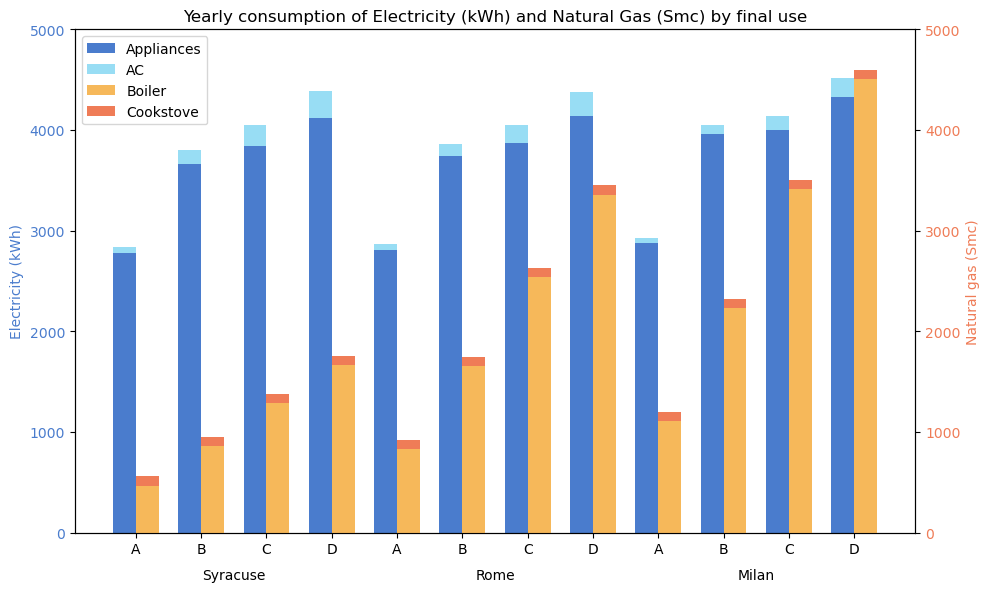

In [9]:
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x - width/2, df_graph['YEE'], width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x - width/2, df_graph['AC'], width, bottom=df_graph['YEE'], label='AC', color='#98DDF4')
ax1.set_ylabel('Electricity (kWh)', color='#4A7CCD')
ax1.tick_params(axis='y', labelcolor='#4A7CCD')
ax1.set_ylim(0, 5000)

# Aggiungiamo le barre sovrapposte per il gas
ax2 = ax1.twinx()
rects4 = ax2.bar(x + width/2, df_graph['Boiler'], width, label='Boiler', color='#F6B85A')
rects5 = ax2.bar(x + width/2, df_graph['Cooking'], width, bottom=df_graph['Boiler'], label='Cookstove', color='#EF7C57')
ax2.set_ylabel('Natural gas (Smc)', color='#EF7C57')
ax2.tick_params(axis='y', labelcolor='#EF7C57')
ax2.set_ylim(0, 5000)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)
handles2, labels2 = ax2.get_legend_handles_labels()  # Otteniamo le barre di ax2 (gas)

# Creiamo una legenda combinata in ax1
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')

# Titolo e layout
plt.title('Yearly consumption of Electricity (kWh) and Natural Gas (Smc) by final use')
fig.tight_layout()

# Mostriamo il grafico
plt.show()


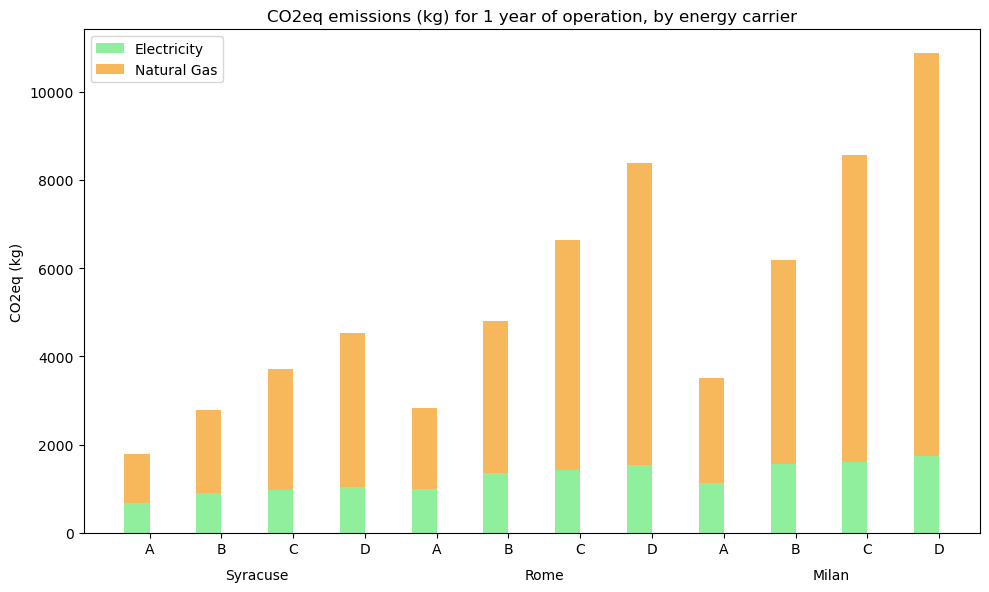

In [10]:
# Definiamo la posizione delle barre
x = np.arange(len(df_CO2_act['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax.bar(x - width/2, df_CO2_act['EE'], width, label='Electricity', color='#8FEF9D')
rects2 = ax.bar(x - width/2, df_CO2_act['gas'], width, bottom=df_CO2_act['EE'], label='Natural Gas', color='#F6B85A')

# Aggiungiamo le etichette per gli utenti
ax.set_xticks(x)
ax.set_xticklabels(df_CO2_act['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())


# Aggiungiamo la legenda
ax.legend()
ax.set_ylabel('CO2eq (kg)')

# Titolo e layout
plt.title('CO2eq emissions (kg) for 1 year of operation, by energy carrier')
fig.tight_layout()

# Mostriamo il grafico
plt.show()